In [5]:
import numpy as np 
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling3D, Flatten
import seaborn as sns
sns.set_theme(style="dark")
from tensorflow.keras.models import load_model
import uuid 
import time 
import shutil
import random

pictures from video by seconds

In [ ]:
IMAGES_PATH = os.path.join('images')
number_images = 10


def resized(frame,h=0.75,w=0.75):
    width=int(frame.shape[1]*w)
    height=int(frame.shape[0]*h)
    dimensions=(width,height)
    return cv.resize(frame,dimensions,interpolation=cv.INTER_AREA)

cap = cv.VideoCapture("video/000258ba44--647574b13f275f4749edc0a0.mov")

for imgnum in range(number_images):
    ret, frame = cap.read()
    frame = resized(frame,0.6,1)
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv.imwrite(imgname, frame)
    cv.imshow('frame', frame)
    time.sleep(0.1)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

pictures from video by frames

In [ ]:
num_frames = 0
IMAGES_PATH = os.path.join('images')

cap = cv.VideoCapture("video/face_reconation.py - Python-R - Visual Studio Code 2023-07-06 16-39-48.mp4")

while True:
    true, frame = cap.read()
    if num_frames % 30 == 0 :
        imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
        cv.imwrite(imgname, frame)
    num_frames += 1
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows() 

organising folders from different sources

In [23]:
for folder in os.listdir(os.path.join("train")):
    new_data_path = os.path.join("data1",folder)
    for subfold in os.listdir(os.path.join("train",folder)):
        for img in os.listdir(os.path.join("train",folder,subfold)) :
            pic = cv.imread(os.path.join("train",folder,subfold,img))
            cv.imwrite(os.path.join(new_data_path,img),pic)
            

In [14]:
liste = []
for folder in os.listdir(os.path.join("samples")):
    for fold in os.listdir(os.path.join("samples",folder)) :
        liste.append(fold)

In [19]:
np.unique(liste,return_counts=True)

(array(['live_video.MOV', 'live_video.mp4'], dtype='<U14'),
 array([ 7, 22], dtype=int64))

In [2]:
vid_num = 0
for folder in os.listdir(os.path.join("samples")):
    for fold in os.listdir(os.path.join("samples",folder)) :
        if (fold == "live_video.MOV") or (fold == "live_video.mp4"):
            shutil.move(os.path.join("samples",folder,fold), os.path.join("video"))
            for video in os.listdir("video") :
                old_video_path = os.path.join("video", video)
                new_video_path = os.path.join("video", str(video).split(".")[0] + str(vid_num) + "." + str(video).split(".")[1])
                os.rename(old_video_path, new_video_path)
        vid_num += 1

In [ ]:
for vid in os.listdir("video") :
    cap = cv.VideoCapture(f"video/{vid}")

    while True:
        true, frame = cap.read()
        print(frame)

In [4]:
num_frames = 0
IMAGES_PATH = os.path.join('images')

for vid in os.listdir("video") :
    video_path = os.path.join("video",vid)
    cap = cv.VideoCapture(video_path)

    while True:
        true, frame = cap.read()
        if not true :
            break
        if num_frames % 30 == 0 :
            imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
            cv.imwrite(imgname, frame)
        num_frames += 1
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
cv.destroyAllWindows() 

In [3]:
# Set the path to the folder containing the pictures
folder_path = os.path.join("anti_spoof_f","spoof")

# Set the number of pictures you want to randomly select
num_pictures_to_select = 900

picture_files = [file for file in os.listdir(folder_path)]

# Randomly select num_pictures_to_select pictures
selected_pictures = random.sample(picture_files, num_pictures_to_select)

output_folder = os.path.join("data3","spoof")

# Copy the selected pictures to the new folder
for file in selected_pictures:
    src = os.path.join(folder_path, file)
    dst = os.path.join(output_folder, file)
    shutil.copy(src, dst)

print(f"Successfully copied {num_pictures_to_select} random pictures to the output folder.")


Successfully copied 900 random pictures to the output folder.


visualising

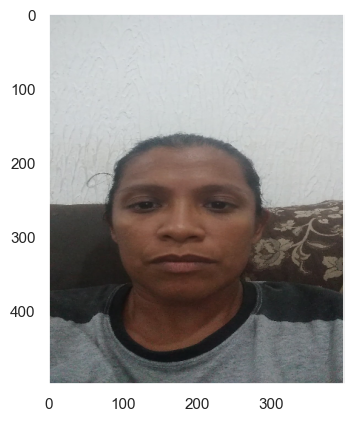

In [4]:
#img = cv.imread(os.path.join("data","real","112.jpg"))
img = cv.imread(os.path.join("images","b9a7a51a-23e4-11ee-b76d-40b076479b03.jpg"))
img  = cv.cvtColor(img,cv.COLOR_RGB2BGR)
img = cv.resize(img,(400,500))
plt.imshow(img);

In [12]:
img.shape

(600, 600, 3)

loading data

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [8]:
data = keras.utils.image_dataset_from_directory("data3",class_names= ["real","spoof"],image_size=(400,600))

Found 6103 files belonging to 2 classes.


In [9]:
numpy_data = data.as_numpy_iterator()

In [10]:
batch_raw = numpy_data.next()

In [11]:
batch_raw[0].shape

(32, 400, 600, 3)

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch_raw[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch_raw[1][idx])

scaling data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
normalised_data = data.as_numpy_iterator()
batch = normalised_data.next()

In [15]:
batch

(array([[[[0.5019608 , 0.5882353 , 0.67058825],
          [0.5019608 , 0.5882353 , 0.67058825],
          [0.49019608, 0.5771242 , 0.65751636],
          ...,
          [0.27581716, 0.3071897 , 0.31503284],
          [0.2784314 , 0.30980393, 0.31764707],
          [0.2784314 , 0.30980393, 0.31764707]],
 
         [[0.5011765 , 0.5890196 , 0.6698039 ],
          [0.5011765 , 0.5890196 , 0.6698039 ],
          [0.48954248, 0.57797384, 0.6569935 ],
          ...,
          [0.28169954, 0.31326818, 0.3200002 ],
          [0.28470588, 0.31647056, 0.32313725],
          [0.28470588, 0.31647056, 0.32313725]],
 
         [[0.49803922, 0.5921569 , 0.6666667 ],
          [0.49803922, 0.5921569 , 0.6666667 ],
          [0.48692814, 0.58137256, 0.654902  ],
          ...,
          [0.30522904, 0.33758205, 0.3398696 ],
          [0.30980393, 0.34313726, 0.34509805],
          [0.30980393, 0.34313726, 0.34509805]],
 
         ...,
 
         [[0.49019608, 0.57843137, 0.6019608 ],
          [0.49019

In [16]:
print([batch[0].max(),batch[0].min(),batch[0].mean()])

[1.0, 0.0, 0.5319368]


In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [18]:
len(data)

191

splitting data

In [19]:
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.1)+1
val_size = int(len(data)*0.2)

In [20]:
print(train_size+test_size+val_size)

191


In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
print(len(train)+len(test)+len(val))

191


In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 400, 600, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

CNN

In [24]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1,  activation='relu', input_shape=(400, 600, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), 1,  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 598, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 299, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 297, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 148, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 146, 16)       4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 73, 16)       0

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
logdir = "logs"
callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cpu cores limit

In [28]:
#os.environ["OMP_NUM_THREADS"] = "8"

In [29]:
history = model.fit(train, epochs=6, validation_data=val, callbacks=callbacks)

Epoch 1/6
133/133 [==============================] - 695s 5s/step - loss: 0.6107 - accuracy: 0.7185 - val_loss: 0.4475 - val_accuracy: 0.7664
Epoch 2/6
133/133 [==============================] - 679s 5s/step - loss: 0.3316 - accuracy: 0.8583 - val_loss: 0.2518 - val_accuracy: 0.8890
Epoch 3/6
133/133 [==============================] - 677s 5s/step - loss: 0.2004 - accuracy: 0.9248 - val_loss: 0.1578 - val_accuracy: 0.9416
Epoch 4/6
133/133 [==============================] - 697s 5s/step - loss: 0.1270 - accuracy: 0.9537 - val_loss: 0.2273 - val_accuracy: 0.9202
Epoch 5/6
133/133 [==============================] - 686s 5s/step - loss: 0.0919 - accuracy: 0.9662 - val_loss: 0.1418 - val_accuracy: 0.9589
Epoch 6/6
133/133 [==============================] - 679s 5s/step - loss: 0.0574 - accuracy: 0.9793 - val_loss: 0.1724 - val_accuracy: 0.9441


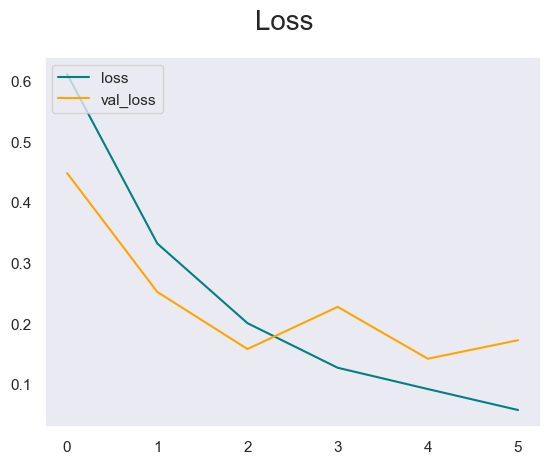

In [30]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

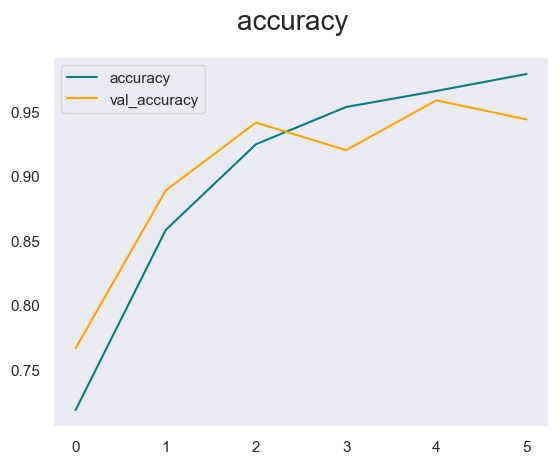

In [31]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 1s 1s/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.86918604, shape=(), dtype=float32) tf.Tensor(0.98032784, shape=(), dtype=float32) tf.Tensor(0.9191759, shape=(), dtype=float32)


test 

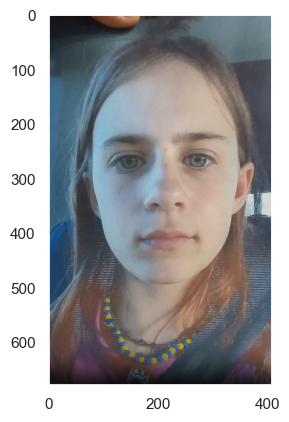

In [34]:
img_test = cv.imread(os.path.join("Capture.PNG"))
plt.imshow(cv.cvtColor(img_test,cv.COLOR_BGR2RGB));

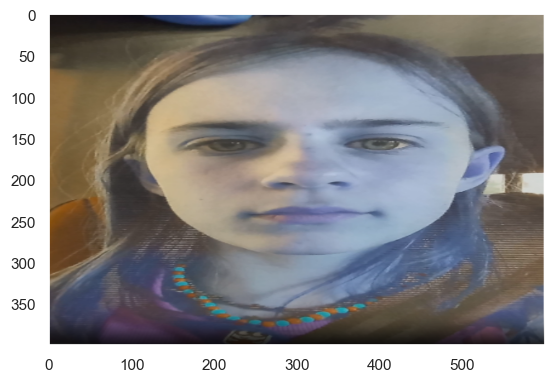

In [35]:
resize = tf.image.resize(img_test, (400,600))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 100ms/step


array([[0.99998826]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is spoof')
else:
    print(f'Predicted class is real')

Predicted class is spoof


In [38]:
model.save(os.path.join('models','imageclassifier_3.h5'))

In [40]:
new_model = load_model('models/imageclassifier_1.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0),verbose = 0)[0]

array([0.999194], dtype=float32)

real time test

using haar cascade

In [ ]:

face_cascade = cv.CascadeClassifier("models/haar_face.xml")

video = cv.VideoCapture(0)
new_model = load_model('models/imageclassifier_3.h5')

while True:
    true, frame = video.read()
    image = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces_rect = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=2)
    cv.imshow('Detected Faces', frame)
    resize = tf.image.resize(frame, (256,256))
    yhat = new_model.predict(np.expand_dims(resize/255, 0),verbose=0)
    if yhat> 0.5:
        label = 'fake'
    else:
        label = 'real'
        
    
    for (x,y,w,h) in faces_rect:
        cv.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), thickness=2)
        cv.putText(frame, label, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 1)
        

    cv.imshow('Detected Faces', frame)

    cv.waitKey(1)


using YOLO V8 for face detection 

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO("models/yolov8n-face.pt")

new_model = load_model('models/imageclassifier_2.h5')
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Detect faces using YOLOv5s-face model
    results = model(frame)
    
    resize = tf.image.resize(frame, (256,256))
    yhat = new_model.predict(np.expand_dims(resize/255, 0),verbose=0)
    if yhat> 0.5:
        label = 'fake'
    else:
        label = 'real'

    # Draw bounding boxes around detected faces
    for result in results[0].boxes:
        top_left_x = int(result.xyxy.tolist()[0][0])
        top_left_y = int(result.xyxy.tolist()[0][1])
        bottom_right_x = int(result.xyxy.tolist()[0][2])
        bottom_right_y = int(result.xyxy.tolist()[0][3])
        
        
        cv2.rectangle(frame, (top_left_x,top_left_y), (bottom_right_x,bottom_right_y), (255, 0, 0), 2)
        cv2.putText(frame, label, (top_left_x, top_left_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the resulting frame
    cv2.imshow('Detected Faces', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()